# ELG7186 - Fall 2022 - Assignment 3
## Due: <strong>Wednesday Nov. 23<sup>st</sup> 2022 -- 11:59pm</strong>

In this assignment, you will apply your knowledge of CNNs we want to estimate the growth stage of weeds using the number of leaves of the plant. The more leaves, the more the weed has grown.

The purpose of this assignment is to gain experience building and training neural networks. You will gain:
- More experience training CNNs
- Experience with problem reformulation
- Experience with techniques for improving results (Regularization, Data Augmentation)

You must use Keras with the Tensorflow backend, i.e., the package tensorflow.keras. For this assignment, you may use other tensorflow packages and scikit-learn, scikit-image or pandas but not other deep learning frameworks, e.g., pytorch, mxnet etc.

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


### DO NOT submit any images from the dataset

## Part 0. Data Preparation

The data for this assignment are plant images at different resolutions captured with a variety of cameras. There are images showing plants with approximatelty 1,2,3,4 and 6 leafs. The images are part of a Leaf counting dataset by Teimouri et al. [1] which can be downloaded from the Aarhus University, Denmark:

<a href="https://vision.eng.au.dk/leaf-counting-dataset/">Leaf counting dataset</a> (Required files are posted on Brightspace)

However, you must work with the subset of images posted on BrightSpace as training.zip and testing.zip. There are 200 images for each of the 5 classes. As Figure 1 shows, there is a great variety of plants and image conditions. The dataset is split into a training and a testing set where there are 180 images per class for training and validation; and 20 images for testing.




In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Use the splits provided in the Brightspace files</li>
<li>Visualize five images from the dataset.</li>
</ul>


# Download the dataset as described above

In [7]:
# Prepare your dataset here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import backend as BK
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/mm/Downloads/training',
  validation_split=0.2,
  subset="training",
    label_mode='categorical',
  image_size=(128,128),
  batch_size=128,
  seed =123)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/mm/Downloads/training' ,
  validation_split=0.2,
  subset="validation",
    label_mode='categorical',
  image_size=(128, 128),
  batch_size=128,
seed=123)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/mm/Downloads/testing' ,
  
    label_mode='categorical',
  image_size=(128, 128),
  batch_size=128,
seed=123)

Found 900 files belonging to 5 classes.
Using 720 files for training.
Found 900 files belonging to 5 classes.
Using 180 files for validation.
Found 100 files belonging to 5 classes.


# Visualize five images from the dataset.

In [ ]:
def display_five_image(imgs):
 
    plt.figure(figsize=(10, 10))
    for imgs, labels in imgs.take(5):
        for i in range(5):
            ax = plt.subplot(5, 4, i + 1)
            plt.imshow(imgs[i].numpy().astype("uint8"))
            plt.axis("off")

    plt.show()

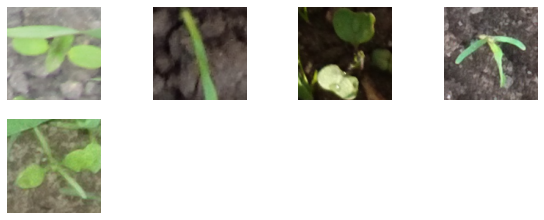

In [ ]:
display_five_image(train_data)

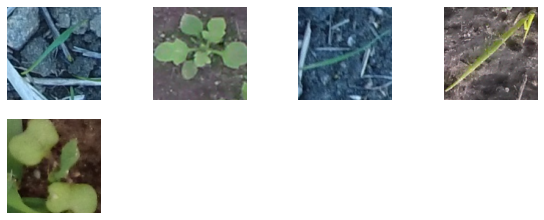

In [ ]:
display_five_image(val_data)

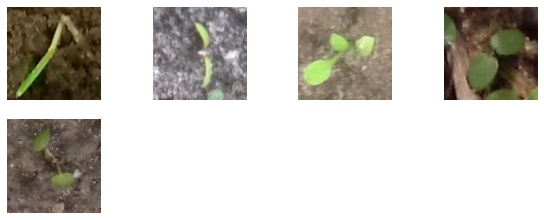

In [ ]:
display_five_image(test_data)

## Part 1a. Transfer Learning - Classification Network (3 Marks)
For this assignment, you are asked to use the Keras implementation of VGG-16 as a starting point. 

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected or convolutional layers to the network including the final output layer. 

- You can use as many pooling, flattening, 1 × 1 convolution layers, etc. as you wish but do not use any regularization.
- Train this simple network on the training set while monitoring convergence on the validation set.
- As input to the model use images of size no larger than 128×128.

Note, it is highly recommended to use even smaller input images to try things out. You are not expected to fine-tune the initial VGG layers.

When your classifier is working:
- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


# **Part 1a**

In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

**Splitting the data into training and validation and testing **

In [8]:
X_train = np.concatenate([x for x,y in train_data], axis =0)
y_train= np.concatenate([y for x,y in train_data], axis =0)
X_val = np.concatenate([x for x,y in val_data], axis =0)
y_val= np.concatenate([y for x,y in val_data], axis =0)

In [9]:
X_test = np.concatenate([x for x,y in test_data], axis =0)
y_test= np.concatenate([y for x,y in test_data], axis =0)

In [10]:
y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1.

## **Classification **

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
Vgg=tf.keras.applications.VGG16(
    weights='imagenet',
                  include_top=False,
                  input_shape=(128,128, 3))

In [ ]:
print(Vgg.summary())



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
for layer in Vgg.layers:
    layer.trainable = False

m1 = Vgg.layers[6].output
m1= Conv2D(500, kernel_size=5, activation='LeakyReLU', padding='same')(m1)
m1= MaxPooling2D(pool_size=(2, 2))(m1)
m1 = Flatten()(m1)
m1 = Dense(300, activation = "LeakyReLU")(m1)
m1 = Dense(5, activation='softmax')(m1)

from tensorflow.keras.models import Model
Vgg_model_transfer = Model(inputs=Vgg.input, outputs=m1)

In [ ]:
print(Vgg_model_transfer.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
batchSize = 32
nEpochs = 50
#callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
Vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=optimizer, 
                           metrics=['accuracy'])
history_vgg = Vgg_model_transfer.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1,
                                 validation_data=(X_val,y_val))

Epoch 1/50
23/23 [==============================] - 24s 1s/step - loss: 5635.7344 - accuracy: 0.1917 - val_loss: 1026.6455 - val_accuracy: 0.1389
Epoch 2/50
23/23 [==============================] - 25s 1s/step - loss: 465.3722 - accuracy: 0.3403 - val_loss: 356.7092 - val_accuracy: 0.1556
Epoch 3/50
23/23 [==============================] - 25s 1s/step - loss: 100.6516 - accuracy: 0.6181 - val_loss: 294.6483 - val_accuracy: 0.2111
Epoch 4/50
23/23 [==============================] - 25s 1s/step - loss: 54.8555 - accuracy: 0.7444 - val_loss: 373.0355 - val_accuracy: 0.1722
Epoch 5/50
23/23 [==============================] - 26s 1s/step - loss: 19.7509 - accuracy: 0.8736 - val_loss: 344.7747 - val_accuracy: 0.1778
Epoch 6/50
23/23 [==============================] - 25s 1s/step - loss: 13.2604 - accuracy: 0.9042 - val_loss: 318.6278 - val_accuracy: 0.1222
Epoch 7/50
23/23 [==============================] - 26s 1s/step - loss: 5.9783 - accuracy: 0.9347 - val_loss: 297.7371 - val_accuracy: 0.

In [ ]:
print(Vgg_model_transfer.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
y_predict = Vgg_model_transfer.predict(X_test.astype(float))
y_predict_vgg = y_predict.argmax(axis=-1)

4/4 [==============================] - 2s 439ms/step


In [ ]:
y_predict_val = Vgg_model_transfer.predict(X_val)
y_predict_val_vgg = y_predict_val.argmax(axis=-1)

6/6 [==============================] - 3s 538ms/step


In [ ]:
y_predict_train = Vgg_model_transfer.predict(X_train)
y_predict_train_vgg = y_predict_train.argmax(axis=-1)

23/23 [==============================] - 13s 563ms/step


## Classifcation report and confusion matrix for training

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
print(classification_report(y_train.argmax(axis=-1),y_predict_train_vgg))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       141
           1       0.99      0.99      0.99       144
           2       1.00      1.00      1.00       134
           3       1.00      0.99      1.00       154
           4       0.97      1.00      0.99       147

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



<AxesSubplot:>

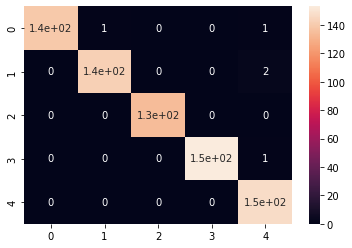

In [ ]:
sn.heatmap(confusion_matrix(y_train.argmax(axis=-1),y_predict_train_vgg), annot=True)

## Classifcation report and confusion matrix for validation

In [ ]:
print(classification_report(y_val.argmax(axis=-1),y_predict_val_vgg));

              precision    recall  f1-score   support

           0       0.06      0.03      0.04        39
           1       0.10      0.08      0.09        36
           2       0.27      0.26      0.27        46
           3       0.07      0.12      0.09        26
           4       0.12      0.18      0.15        33

    accuracy                           0.14       180
   macro avg       0.13      0.13      0.13       180
weighted avg       0.14      0.14      0.13       180



<AxesSubplot:>

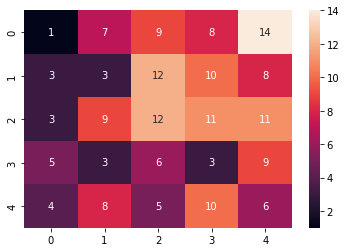

In [ ]:
sn.heatmap(confusion_matrix(y_val.argmax(axis=-1),y_predict_val_vgg), annot=True)

 ## Classifcation report and confusion matrix for testing

In [ ]:
print(classification_report(y_test.argmax(axis=-1),y_predict_vgg))

              precision    recall  f1-score   support

           0       0.13      0.10      0.11        20
           1       0.00      0.00      0.00        20
           2       0.14      0.15      0.14        20
           3       0.26      0.25      0.26        20
           4       0.09      0.15      0.11        20

    accuracy                           0.13       100
   macro avg       0.12      0.13      0.12       100
weighted avg       0.12      0.13      0.12       100



<AxesSubplot:>

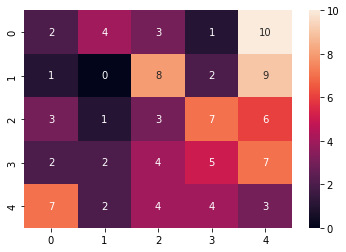

In [ ]:
confusion_matrix = confusion_matrix(y_test.argmax(axis=-1), y_predict_vgg)
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
def draw_CM_AND_Make_Classification_report(y_test,y_predict,text):
    print('\nConfusion Matrix:\n')
    print(confusion_matrix(y_test, y_predict))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict ), annot=True, cmap='PuBuGn')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(text, fontsize=18)
    plt.show()
    print(classification_report(y_test,y_predict))

## Plot a Accuracy curve for training and validation data

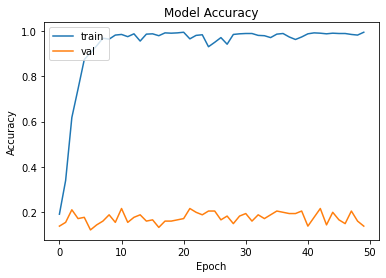

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_vgg.history :
    k = 'accuracy'    

if 'acc' in history_vgg.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_vgg.history[k])
    plt.plot(history_vgg.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

## Plot a Loss curve for training and test data

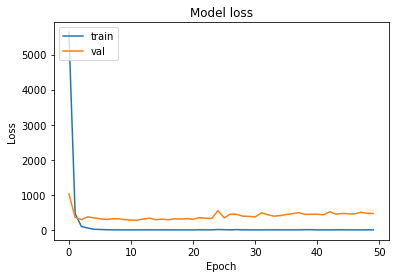

In [ ]:
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Disscusion the results

The model's final accuracy on training data, according to the classification report, is 99%, as shown in the confusion matrix and report for Training Data. This indicates that the model is overfitting and that it can only perform well on Training Data; the overfitting occurred because the Data was too Small.

As demonstrated in the confusion matrix and the classification report for validation data, the model's ability to classify classes accurately on validation data during training has resulted in recording poor accruacies, and the model is unable to converge on validation data.

# Accuracy and loss Graph Discussion¶
The model's accuracy began at 0.19 and peaked at 0.9944 on epoch No. 21 before falling until it hit 0.98 and then rising again to 0.9944 in the last epoch. However, generally, the model's accuracy was poor, registering 0.9944 accruacy on training data, 0.14 on variation, and 0.13 on testing data.

Loss across training epochs began with a high value, fell to 0.5260 on epoch number 18, and then increased to 2.0317 on testing data.
Overall, the model performed poorly on both validation and testing data because it was overfit to the data.

## Part 1b. Transfer Learning - Regression Reformulation (3 Marks)

### Step 1 (2)
Repeat the steps of Part 1a. but reformulate as a regression problem, i.e., your network needs to output a single float value ranging between 0 to 6 corresponding to the number of leaves. Again, you are not expected to fine-tune the initial VGG layers.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.

### Step 2 (1)
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

# **Part 1b Regression**

# Step 1 

In [35]:
y_train_mapp = {0:1, 1:2, 2:3,3:4, 4:6}
y_train= np.concatenate([y for x,y in train_data], axis =0).argmax(axis=-1)
y_val= np.concatenate([y for x,y in val_data], axis =0).argmax(axis=-1)
y_ts = y_test.argmax(axis=-1)

In [36]:
y_ts

array([3, 4, 2, 3, 0, 2, 0, 1, 4, 3, 3, 2, 2, 2, 1, 0, 2, 4, 0, 1, 4, 4,
       3, 3, 0, 1, 2, 4, 3, 3, 3, 4, 0, 2, 1, 3, 4, 1, 0, 0, 0, 1, 3, 4,
       2, 2, 1, 2, 4, 2, 0, 4, 1, 4, 1, 1, 3, 1, 3, 2, 0, 3, 1, 3, 3, 1,
       0, 0, 0, 1, 0, 4, 4, 0, 2, 0, 2, 2, 0, 4, 1, 2, 2, 1, 2, 2, 1, 1,
       4, 3, 1, 0, 4, 4, 3, 3, 4, 0, 3, 4], dtype=int64)

In [37]:
y_Tr = np.array([y_train_mapp[key] for key in y_train]).astype(float)
y_Va = np.array([y_train_mapp[key] for key in y_val]).astype(float)
y_ts =np.array([y_train_mapp[key] for key in y_ts]).astype(float)

In [38]:
Vgg_reg=tf.keras.applications.VGG16(
    weights='imagenet',
                  include_top=False,
                  input_shape=(128,128, 3))

In [39]:
for layer in Vgg_reg.layers:
    layer.trainable = False
m2 = Vgg_reg.layers[6].output
m2= Conv2D(500, kernel_size=5, activation='tanh')(m2)
m2= MaxPooling2D(pool_size=(2, 2))(m2)
m2 = Flatten()(m2)
m2 = Dense(300, activation = "relu")(m2)
m2 = Dense(1)(m2)

from tensorflow.keras.models import Model
Vgg_model_reg = Model(inputs=Vgg_reg.input, outputs=m2)


In [40]:
print(Vgg_model_reg.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
y_Va

array([3., 4., 1., 3., 2., 1., 1., 4., 1., 3., 1., 3., 2., 1., 2., 3., 1.,
       3., 2., 4., 2., 1., 2., 1., 6., 3., 3., 4., 2., 2., 4., 6., 6., 6.,
       3., 6., 3., 6., 2., 2., 3., 6., 1., 4., 4., 4., 1., 2., 1., 6., 6.,
       6., 3., 1., 3., 3., 3., 4., 3., 6., 3., 3., 3., 4., 2., 4., 1., 1.,
       1., 3., 2., 2., 2., 3., 3., 3., 3., 4., 1., 4., 2., 3., 2., 6., 3.,
       2., 3., 3., 3., 2., 6., 1., 6., 6., 2., 3., 1., 1., 1., 2., 2., 3.,
       6., 6., 6., 6., 1., 3., 6., 1., 6., 4., 6., 4., 6., 3., 3., 2., 1.,
       4., 1., 6., 1., 1., 3., 2., 6., 1., 2., 6., 4., 2., 6., 4., 1., 2.,
       6., 4., 3., 6., 1., 1., 4., 2., 3., 3., 3., 6., 2., 4., 4., 1., 3.,
       4., 2., 2., 6., 4., 1., 3., 2., 2., 3., 2., 2., 1., 2., 1., 1., 3.,
       6., 4., 1., 1., 3., 1., 4., 3., 3., 6.])

I changed The optimizer  here because Adam Optimizer couldn't perform well and MSE was stucked at point and the model wasn't able to learn

In [41]:
batchSize = 32
nEpochs = 50

optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.0001)
Vgg_model_reg.compile(loss='mean_squared_error', 
                           optimizer=optimizer, 
                           metrics=['accuracy','mean_squared_error'])
history_vgg_regression = Vgg_model_reg.fit(X_train, y_Tr, batch_size=batchSize, epochs=nEpochs, verbose=1,
                                 validation_data=(X_val,y_Va))

Epoch 1/50
23/23 [==============================] - 19s 821ms/step - loss: 22.7290 - accuracy: 0.1722 - mean_squared_error: 22.7290 - val_loss: 2.8535 - val_accuracy: 0.2167 - val_mean_squared_error: 2.8535
Epoch 2/50
23/23 [==============================] - 20s 855ms/step - loss: 3.0035 - accuracy: 0.1958 - mean_squared_error: 3.0035 - val_loss: 3.0252 - val_accuracy: 0.2167 - val_mean_squared_error: 3.0252
Epoch 3/50
23/23 [==============================] - 21s 924ms/step - loss: 2.9527 - accuracy: 0.1958 - mean_squared_error: 2.9527 - val_loss: 3.2165 - val_accuracy: 0.2167 - val_mean_squared_error: 3.2165
Epoch 4/50
23/23 [==============================] - 21s 929ms/step - loss: 2.9347 - accuracy: 0.1958 - mean_squared_error: 2.9347 - val_loss: 2.9746 - val_accuracy: 0.2167 - val_mean_squared_error: 2.9746
Epoch 5/50
23/23 [==============================] - 21s 927ms/step - loss: 2.9037 - accuracy: 0.1958 - mean_squared_error: 2.9037 - val_loss: 3.0918 - val_accuracy: 0.2167 - val_

In [42]:
print(Vgg_model_reg.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [44]:
y_predict_vgg_reg  = Vgg_model_reg.predict(X_test)


4/4 [==============================] - 2s 374ms/step


In [45]:
y_predict_val_reg = Vgg_model_reg.predict(X_val)

6/6 [==============================] - 3s 473ms/step


In [47]:
y_predict_train_reg = Vgg_model_reg.predict(X_train)

23/23 [==============================] - 11s 501ms/step


In [46]:
y_predict_vgg_reg

array([[3.1152248],
       [2.6974626],
       [3.017848 ],
       [3.3603756],
       [3.109271 ],
       [2.5867674],
       [2.4752169],
       [2.733469 ],
       [3.6344953],
       [2.8341255],
       [3.038903 ],
       [2.8709843],
       [3.2397306],
       [3.1221147],
       [2.6798239],
       [2.7779694],
       [3.3446472],
       [3.1381395],
       [3.2042935],
       [2.959012 ],
       [3.3534305],
       [2.7897196],
       [3.4355903],
       [3.023756 ],
       [3.1748085],
       [2.9054086],
       [3.2945774],
       [3.1727805],
       [3.1057425],
       [3.72573  ],
       [2.9378452],
       [2.814858 ],
       [2.2447448],
       [2.9770172],
       [2.6617393],
       [2.8670433],
       [2.9488833],
       [3.019334 ],
       [2.7039258],
       [2.632125 ],
       [2.7129502],
       [2.2485666],
       [2.616971 ],
       [3.4806416],
       [3.3061543],
       [2.6894288],
       [3.145825 ],
       [3.0361524],
       [3.0659628],
       [3.0270123],


### Mean Square Error for Train Data

In [48]:
print(mean_squared_error(y_predict_train_reg, y_Tr, squared=False))

1.2406185655351738


### Mean Square Error for validation Data

In [49]:
mean_squared_error(y_predict_val_reg, y_Va, squared=False)

1.765537666932765

### the Mean Square Error for Test Data

In [51]:
mean_squared_error(y_predict_vgg_reg, y_ts, squared=False)

1.6948776995008754

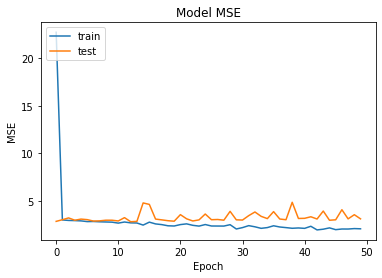

In [52]:
# dictionary keys seems to have changed in version 2
k = ''
if 'mean_squared_error' in history_vgg_regression.history :
    k = 'mean_squared_error'    

if 'mse' in history_vgg_regression.history :
    k = 'mse'
    
if k != '' :    
    plt.plot(history_vgg_regression.history[k])
    plt.plot(history_vgg_regression.history['val_'+k])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [53]:
new_y_predict_vgg_reg=[]
for i,x in enumerate (y_predict_vgg_reg):
    #print(y_predict_vgg_reg[i][0])
    y_predict_vgg_reg[i][0]=round(y_predict_vgg_reg[i][0])
    new_y_predict_vgg_reg.append(round(y_predict_vgg_reg[i][0]))

Breaking Down of Mean Squared Error. Model scored 1.24 on training data, which indicates that it is underfitting as a regression model because the squared distance between the observed and predicted points is large.
Model failed to converge and showed a high RMSE while scoring 1.76 on the validation data.
The model had a somewhat better 1.69 RMSE on the testing data, which had a bad RMSE.

 When I rounding the float outputs to intger number this will convert the Mean squre error to accuracy and plotting the confusion matrix and classifcation report


In [54]:
y_predict_vgg_reg = y_predict_vgg_reg.astype(int)
y_predict_val_reg = y_predict_val_reg.astype(int)
y_predict_train_reg = y_predict_train_reg.astype(int)

In [55]:
y_predict_vgg_reg=y_predict_vgg_reg.astype(int)

## Classifcation report and confusion matrix for testing

In [56]:
print(classification_report(new_y_predict_vgg_reg, y_ts))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.10      0.29      0.15         7
         3.0       0.85      0.20      0.32        85
         4.0       0.10      0.25      0.14         8
         6.0       0.00      0.00      0.00         0

    accuracy                           0.21       100
   macro avg       0.21      0.15      0.12       100
weighted avg       0.74      0.21      0.30       100



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
y_ts=y_ts.astype(int)

In [58]:
y_ts

array([4, 6, 3, 4, 1, 3, 1, 2, 6, 4, 4, 3, 3, 3, 2, 1, 3, 6, 1, 2, 6, 6,
       4, 4, 1, 2, 3, 6, 4, 4, 4, 6, 1, 3, 2, 4, 6, 2, 1, 1, 1, 2, 4, 6,
       3, 3, 2, 3, 6, 3, 1, 6, 2, 6, 2, 2, 4, 2, 4, 3, 1, 4, 2, 4, 4, 2,
       1, 1, 1, 2, 1, 6, 6, 1, 3, 1, 3, 3, 1, 6, 2, 3, 3, 2, 3, 3, 2, 2,
       6, 4, 2, 1, 6, 6, 4, 4, 6, 1, 4, 6])

In [59]:
new_y_predict_vgg_reg=np.array(new_y_predict_vgg_reg)

In [60]:
new_y_predict_vgg_reg.shape

(100,)

<AxesSubplot:>

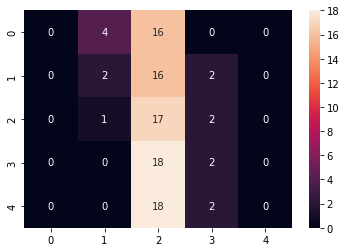

In [61]:
sn.heatmap(confusion_matrix(y_ts,new_y_predict_vgg_reg), annot=True)


## Classifcation report and confusion matrix for validation

In [62]:
print(classification_report(y_predict_val_reg, y_Va))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.53      0.18      0.27       104
         3.0       0.48      0.30      0.37        74
         4.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0

    accuracy                           0.23       180
   macro avg       0.20      0.10      0.13       180
weighted avg       0.50      0.23      0.31       180



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

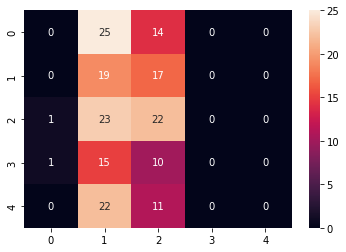

In [63]:
sn.heatmap(confusion_matrix(y_Va,y_predict_val_reg), annot=True)

## Classifcation report and confusion matrix for training

In [64]:
print(classification_report(y_predict_train_reg, y_Tr))

              precision    recall  f1-score   support

         1.0       0.20      0.82      0.32        34
         2.0       0.90      0.35      0.51       369
         3.0       0.33      0.16      0.22       274
         4.0       0.00      0.00      0.00        43
         6.0       0.00      0.00      0.00         0

    accuracy                           0.28       720
   macro avg       0.29      0.27      0.21       720
weighted avg       0.60      0.28      0.36       720



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

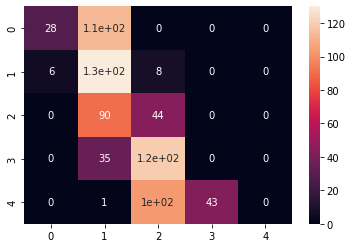

In [65]:
sn.heatmap(confusion_matrix(y_Tr,y_predict_train_reg), annot=True)

## Plot a Accuracy curve for training and validation data

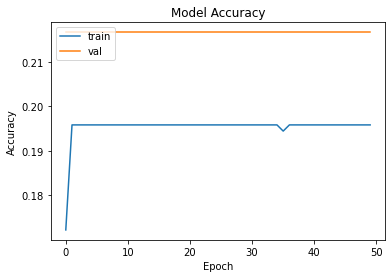

In [66]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_vgg_regression.history :
    k = 'accuracy'    

if 'acc' in history_vgg_regression.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_vgg_regression.history[k])
    plt.plot(history_vgg_regression.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Model started training process recordering loss= 22.7290 and started to decrease till it reached 2.0722 in last epoch

## Plot a Loss curve for training and validation data

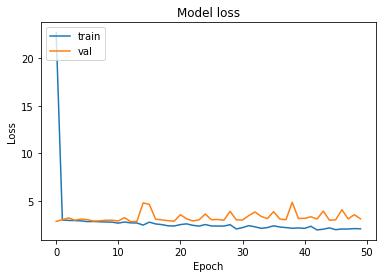

In [67]:
plt.plot(history_vgg_regression.history['loss'])
plt.plot(history_vgg_regression.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

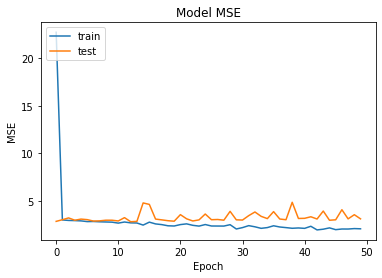

In [68]:

k = ''
if 'mean_squared_error' in history_vgg_regression.history :
    k = 'mean_squared_error'    

if 'mse' in history_vgg_regression.history :
    k = 'mse'
    
if k != '' :    
    plt.plot(history_vgg_regression.history[k])
    plt.plot(history_vgg_regression.history['val_'+k])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

**in part 1 (a) there was overfitting**
The model's final accuracy on training data, according to the classification report, is 99%, as shown in the confusion matrix and report for Training Data. This indicates that the model is overfitting and that it can only perform well on Training Data; the overfitting occurred because the Data was too Small.

As demonstrated in the confusion matrix and the classification report for validation data, the model's ability to classify classes accurately on validation data during training has resulted in recording poor accruacies, and the model is unable to converge on validation data.

**but in part 1 (b)**
Breaking Down of Mean Squared Error. Model scored 1.24  on training data, which indicates that it is underfitting as a regression model because the squared distance between the observed and predicted points is large.
Model failed to converge and showed a high RMSE while scoring 1.76 on the validation data.
The model had a somewhat better 1.69 RMSE on the testing data, which had a bad RMSE.


## Part 2. Improve your Model (4 Marks)

Regularization and data augmentation are common strategies to deal with small datasets.

### Step 1 (1.5)
Incorporate Batch Normalization and Dropout into your design the superior network trained in Part 1. You are not expected to fine-tune the initial VGG layers. Again you will provide the following:
- A loss curve for training and validation data
- An accuracy curve for training and validation data
- A confusion matrix of your network on the training including validation and testing data sets.
 

### Step 2 (1.5)
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1.

### Step 3 (1)
Discuss based on your learning curves and final metrics in Step 2, how large a improvement can be observed from regularization and data augmentation.

# Step 1 Regulaization

In [ ]:
# Write your code here
X_train = np.concatenate([x for x,y in train_data], axis =0)
y_train= np.concatenate([y for x,y in train_data], axis =0)
X_val = np.concatenate([x for x,y in val_data], axis =0)
y_val= np.concatenate([y for x,y in val_data], axis =0)

In [ ]:
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
vgg_regulization_model= tf.keras.applications.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [ ]:
for layer in vgg_regulization_model.layers:
    layer.trainable = False

m3 = vgg_regulization_model.layers[6].output
m3= Conv2D(500, kernel_size=5, activation='tanh')(m3)
m3= MaxPooling2D(pool_size=(2, 2))(m3)
m3=BatchNormalization()(m3)
m3=Dropout(0.5)(m3)

m3 = Dense(300, activation = "LeakyReLU")(m3)
m3=BatchNormalization()(m3)
m3=Dropout(0.5)(m3)
m3=Flatten()(m3)
m3= Dense(5, activation='softmax')(m3)

from tensorflow.keras.models import Model
Vgg_model_regulization_transfer = Model(inputs=vgg_regulization_model.input, outputs=m3)

In [ ]:
X_train.shape

(720, 128, 128, 3)

In [ ]:
batchSize = 32
nEpochs = 50
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
Vgg_model_regulization_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=optimizer, 
                           metrics=['accuracy'])
history_vgg_reulization = Vgg_model_regulization_transfer.fit(X_train, y_train, batch_size=batchSize, epochs=nEpochs, verbose=1,
                                 validation_data=(X_val, y_val))

Epoch 1/50
23/23 [==============================] - 20s 858ms/step - loss: 2.8289 - accuracy: 0.1681 - val_loss: 1.9897 - val_accuracy: 0.2278
Epoch 2/50
23/23 [==============================] - 20s 857ms/step - loss: 2.5359 - accuracy: 0.2333 - val_loss: 2.3166 - val_accuracy: 0.1833
Epoch 3/50
23/23 [==============================] - 22s 944ms/step - loss: 2.2317 - accuracy: 0.3083 - val_loss: 2.4223 - val_accuracy: 0.1722
Epoch 4/50
23/23 [==============================] - 22s 945ms/step - loss: 2.1191 - accuracy: 0.3264 - val_loss: 2.1171 - val_accuracy: 0.1722
Epoch 5/50
23/23 [==============================] - 21s 923ms/step - loss: 1.9834 - accuracy: 0.3375 - val_loss: 1.9301 - val_accuracy: 0.1722
Epoch 6/50
23/23 [==============================] - 21s 932ms/step - loss: 1.9457 - accuracy: 0.3625 - val_loss: 2.1411 - val_accuracy: 0.1889
Epoch 7/50
23/23 [==============================] - 22s 971ms/step - loss: 1.8205 - accuracy: 0.3806 - val_loss: 2.2014 - val_accuracy: 0.1722

In [ ]:
print(Vgg_model_regulization_transfer.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
y_predict_regulization = Vgg_model_regulization_transfer.predict(X_test.astype(float))
y_predict_vgg_regulization = y_predict_regulization.argmax(axis=-1)

4/4 [==============================] - 2s 327ms/step


In [ ]:
y_predict_val_regulization = Vgg_model_regulization_transfer.predict(X_val)
y_predict_val_vgg_regulization = y_predict_val_regulization.argmax(axis=-1)

6/6 [==============================] - 3s 410ms/step


In [ ]:
y_predict_train_regulization = Vgg_model_regulization_transfer.predict(X_train)
y_predict_train_vgg_regulization = y_predict_train_regulization.argmax(axis=-1)

23/23 [==============================] - 10s 439ms/step


## Classifcation report and confusion matrix for training

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
print(classification_report(y_train.argmax(axis=-1),y_predict_train_vgg_regulization))

              precision    recall  f1-score   support

           0       1.00      0.28      0.43       141
           1       0.42      0.97      0.58       144
           2       1.00      0.37      0.54       134
           3       0.58      0.91      0.71       154
           4       1.00      0.37      0.54       147

    accuracy                           0.59       720
   macro avg       0.80      0.58      0.56       720
weighted avg       0.79      0.59      0.56       720



<AxesSubplot:>

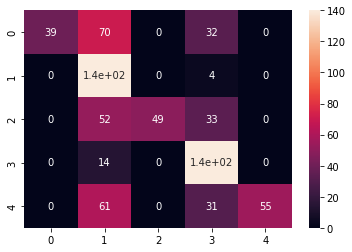

In [ ]:
sn.heatmap(confusion_matrix(y_train.argmax(axis=-1),y_predict_train_vgg_regulization), annot=True)

#### From Confusion matrix of training the model cannot learn class one and three

## Classifcation report and confusion matrix for validation

In [ ]:
print(classification_report(y_val.argmax(axis=-1),y_predict_val_vgg_regulization))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.19      0.56      0.28        36
           2       0.00      0.00      0.00        46
           3       0.21      0.58      0.31        26
           4       0.33      0.03      0.06        33

    accuracy                           0.20       180
   macro avg       0.15      0.23      0.13       180
weighted avg       0.13      0.20      0.11       180



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

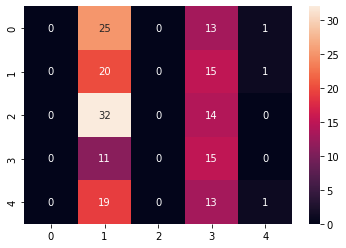

In [ ]:
sn.heatmap(confusion_matrix(y_val.argmax(axis=-1),y_predict_val_vgg_regulization), annot=True)

#### From Confusion matrix of validation the model cannot predict and converge all classes but only the class 1 and class 3 and 4

## Classifcation report and confusion matrix for testing

In [ ]:
print(classification_report(y_test.argmax(axis=-1),y_predict_vgg_regulization))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.18      0.55      0.27        20
           2       0.00      0.00      0.00        20
           3       0.22      0.40      0.29        20
           4       0.00      0.00      0.00        20

    accuracy                           0.19       100
   macro avg       0.08      0.19      0.11       100
weighted avg       0.08      0.19      0.11       100



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

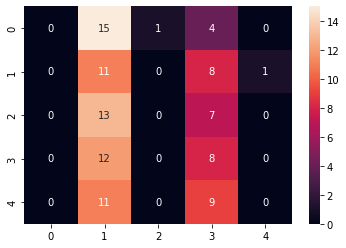

In [ ]:
sn.heatmap(confusion_matrix(y_test.argmax(axis=-1),y_predict_vgg_regulization), annot=True)

#### From Confusion matrix OF testing the model cannot predict and converge all classes but only the class 1 and class 3

## Plot a Accuracy curve for training and validation data

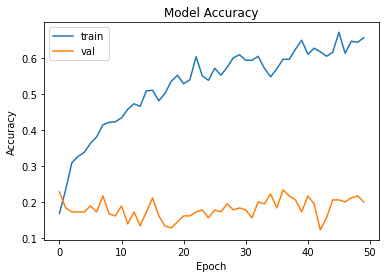

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_vgg_reulization.history :
    k = 'accuracy'    

if 'acc' in history_vgg_reulization.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_vgg_reulization.history[k])
    plt.plot(history_vgg_reulization.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

## Plot a Loss curve for training and validation data

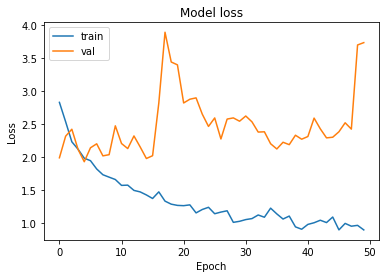

In [ ]:
plt.plot(history_vgg_reulization.history['loss'])
plt.plot(history_vgg_reulization.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Discuss the results of regulization

The model's final accuracy on training data, according to the classification report, is 59%, as shown in the confusion matrix and report for Training Data. This indicates that the model is begine to learn well on the data after regulization and regulization solve the overfitting problem that i faced on part 1 classification.

As demonstrated in the confusion matrix and the classification report for validation data, the model's ability to classify classes accurately on validation data during training has resulted in recording poor accruacies, and the model is unable to converge on validation data well .

Accuracy and loss Graph Discussion¶
The model's accuracy started with 0.16 and peaked at 0.6556 on final epoch   However, generally, the model's accuracy , registering 0.59 accruacy on training data, 0.20 on variation, and 0.19 on testing data.these accurices were grow up after Regularization

Loss across training epochs started with 2.8289, reach to to 0.89 on final epoch ,  Overall the overfitting prolem solved in this part

# Step 2 Data Augmentation

In [11]:
Data_generator = ImageDataGenerator(
        rotation_range=10, 
        width_shift_range=0.2, 
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.2,1.2])

In [5]:
y_train_mapp = {0:1, 1:2, 2:3,3:4, 4:6}
y_train= np.concatenate([y for x,y in train_data], axis =0).argmax(axis=-1)
y_val= np.concatenate([y for x,y in val_data], axis =0).argmax(axis=-1)
y_test = y_test.argmax(axis=-1)

In [12]:
y_train.shape

(720, 5)

In [14]:
#####################################################################Data Agumentation#########################################################################
Data_generator = ImageDataGenerator(rotation_range=11,
        width_shift_range=0.3, 
        height_shift_range=0.3, 
        zoom_range=0.4, 
        horizontal_flip=True, 
        brightness_range=[0.3,1.3])
s = Data_generator.flow(np.array(X_train), y_train )
batch=s.next()
img=batch[0]
labels = batch[1]
X_train_ = np.concatenate([img, X_train])
y_train_ = np.concatenate([labels, y_train])

In [15]:
X_train_augmented=X_train_
y_train_augmented=y_train_

In [16]:
vgg_regulization_model_aug= tf.keras.applications.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

In [17]:
for layer in vgg_regulization_model_aug.layers:
    layer.trainable = False

m3 = vgg_regulization_model_aug.layers[6].output
m3= Conv2D(500, kernel_size=5, activation='tanh')(m3)
m3= MaxPooling2D(pool_size=(2, 2))(m3)
m3=BatchNormalization()(m3)
m3=Dropout(0.5)(m3)

m3 = Dense(300, activation = "LeakyReLU")(m3)
m3=BatchNormalization()(m3)
m3=Dropout(0.5)(m3)
m3=Flatten()(m3)
m3= Dense(5, activation='softmax')(m3)

from tensorflow.keras.models import Model
Vgg_model_regulization_aug_transfer = Model(inputs=vgg_regulization_model_aug.input, outputs=m3)

In [18]:
y_train_augmented.shape

(752, 5)

In [19]:
batchSize = 32
nEpochs = 50
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
Vgg_model_regulization_aug_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=optimizer, 
                           metrics=['accuracy'])
history_vgg_reulization_aug = Vgg_model_regulization_aug_transfer.fit(X_train_augmented, y_train_augmented, batch_size=batchSize, epochs=nEpochs, verbose=1,
                                 validation_data=(X_val, y_val))

Epoch 1/50
24/24 [==============================] - 21s 857ms/step - loss: 2.6394 - accuracy: 0.2088 - val_loss: 1.8163 - val_accuracy: 0.2500
Epoch 2/50
24/24 [==============================] - 21s 871ms/step - loss: 2.5217 - accuracy: 0.2593 - val_loss: 1.8984 - val_accuracy: 0.2389
Epoch 3/50
24/24 [==============================] - 22s 924ms/step - loss: 2.2233 - accuracy: 0.2992 - val_loss: 1.9697 - val_accuracy: 0.1778
Epoch 4/50
24/24 [==============================] - 22s 935ms/step - loss: 2.1180 - accuracy: 0.3138 - val_loss: 1.8977 - val_accuracy: 0.2111
Epoch 5/50
24/24 [==============================] - 22s 920ms/step - loss: 2.1143 - accuracy: 0.2899 - val_loss: 1.7976 - val_accuracy: 0.2444
Epoch 6/50
24/24 [==============================] - 22s 931ms/step - loss: 2.0356 - accuracy: 0.3271 - val_loss: 1.8454 - val_accuracy: 0.1889
Epoch 7/50
24/24 [==============================] - 22s 935ms/step - loss: 1.9779 - accuracy: 0.3444 - val_loss: 2.0876 - val_accuracy: 0.1889

In [20]:
print(Vgg_model_regulization_aug_transfer.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [21]:
y_predict_regulization_aug = Vgg_model_regulization_aug_transfer.predict(X_test.astype(float))
y_predict_vgg_regulization_aug = y_predict_regulization_aug.argmax(axis=-1)

4/4 [==============================] - 2s 366ms/step


In [22]:
y_predict_vgg_regulization_aug

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1.

In [24]:
y_predict_val_regulization_aug = Vgg_model_regulization_aug_transfer.predict(X_val)
y_predict_val_vgg_regulization_aug = y_predict_val_regulization_aug.argmax(axis=-1)

6/6 [==============================] - 3s 460ms/step


In [27]:
y_predict_train_regulization_aug = Vgg_model_regulization_aug_transfer.predict(X_train)
y_predict_train_vgg_regulization_aug = y_predict_train_regulization_aug.argmax(axis=-1)

23/23 [==============================] - 11s 498ms/step


## Classifcation report and confusion matrix for training

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
print(classification_report(y_train.argmax(axis=-1),y_predict_train_vgg_regulization_aug))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40       141
           1       1.00      0.25      0.40       144
           2       1.00      0.34      0.51       134
           3       1.00      0.12      0.21       154
           4       0.96      0.31      0.47       147

    accuracy                           0.40       720
   macro avg       0.84      0.40      0.40       720
weighted avg       0.84      0.40      0.39       720



<AxesSubplot:>

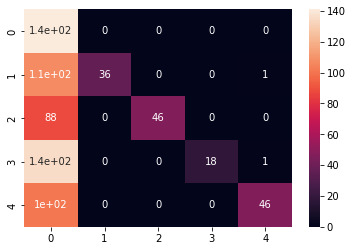

In [29]:
sn.heatmap(confusion_matrix(y_train.argmax(axis=-1),y_predict_train_vgg_regulization_aug), annot=True)

#### from confusion matrix firstly the model overfit on class 0 and didnt learn the classes 1,2,3,4 well for this the model couldnt predict well on testing data

## Classifcation report and confusion matrix for validation

In [30]:
print(classification_report(y_val.argmax(axis=-1),y_predict_val_vgg_regulization_aug))

              precision    recall  f1-score   support

           0       0.21      0.90      0.34        39
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        26
           4       0.12      0.03      0.05        33

    accuracy                           0.20       180
   macro avg       0.07      0.19      0.08       180
weighted avg       0.07      0.20      0.08       180



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

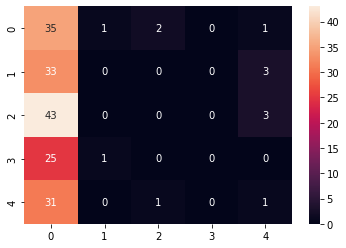

In [31]:
sn.heatmap(confusion_matrix(y_val.argmax(axis=-1),y_predict_val_vgg_regulization_aug), annot=True)

#### from confusion matrix the model recogize the class 0 and class 4 only

## Classifcation report and confusion matrix for testing

In [33]:
print(classification_report(y_test.argmax(axis=-1),y_predict_vgg_regulization_aug))

              precision    recall  f1-score   support

           0       0.21      1.00      0.34        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100



C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

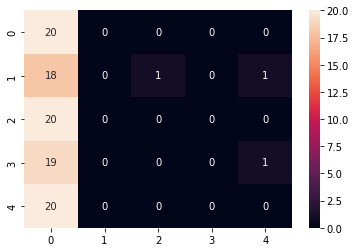

In [34]:
sn.heatmap(confusion_matrix(y_test.argmax(axis=-1),y_predict_vgg_regulization_aug), annot=True)

#### from confusion matrix the model recogize the class 1 only because there is underfitting as the data was small

### Model Accuracy and Confusion Mertics Disucssion of data augmentation
According to the classification report and the confusion matrix, the model's final accuracy on training data is 40%, indicating that there is some type of underfitting that prevents it from doing well on the training data. The model also struggles to converge and learn the classes.

According to the confusion matrix and the report for the validation data, the model had a training accuracy score of 0.20 on the validation data but recorded errors that prevented it from converging on the validation data.
According to the results of testing the data, the model had a 20% accuracy rate and was unable to recognise the actual classes.

 matrix for confusion for training First of all, the model overfit on class 0 and did not learn classes 1, 2, 3, or 4 well. As a result, the model was unable to predict well on testing data and only recognised classes 0 and 4.


and from confusion matrix the model recogize the class 1 only because there is underfitting as the data was small

Data Augmentation didn't help in imorving the accuracy over the training data as the the model wasn't able to learn well 

## Plot a Accuracy curve for training and validation data

In [ ]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_vgg_reulization_aug.history :
    k = 'accuracy'    

if 'acc' in history_vgg_reulization_aug.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_vgg_reulization_aug.history[k])
    plt.plot(history_vgg_reulization_aug.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

## Plot a Loss curve for training and validation data

In [ ]:
plt.plot(history_vgg_reulization_aug.history['loss'])
plt.plot(history_vgg_reulization_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Step 3

### Accuracy and loss Graph Discussion of data Augmentation
The model's final accuracy on training data, according to the classification report, is 59%, as shown in the confusion matrix and report for Training Data. This indicates that the model is begine to learn well on the data after regulization and regulization solve the overfitting problem that i faced on part 1 classification.

As demonstrated in the confusion matrix and the classification report for validation data, the model's ability to classify classes accurately on validation data during training has resulted in recording poor accruacies, and the model is unable to converge on validation data well .

Accuracy and loss Graph Discussion¶ The model's accuracy started with 0.2088  and peaked at 0.56 on  epoch no 41 then ended with 0.5013.  However, generally, the model's accuracy ,  0.40 accruacy on training data, 0.20 on variation, and 0.20 on testing data.
overall will not converge well on data because of the size of data is small

Loss across training epochs started with 2.6394 , reach to to 1.2 on final epoch 

### Model Accuracy and Confusion Mertics Disucssion of data augmentation
According to the classification report and the confusion matrix, the model's final accuracy on training data is 40%, indicating that there is some type of underfitting that prevents it from doing well on the training data. The model also struggles to converge and learn the classes.


As Shown in the confusion matrix and the reoport for valiation data the model scored 0.20 accuracy on validation data during the training process and recoreded bad accruacies during the training process and model cannot converge on validation data
When it came to testing the data the model socred 20% accuracy and couldn't recocgnize the actual classes according to the 
training confusion matrix firstly the model overfit on class 0 and didnt learn the classes 1,2,3,4 well for this the model couldnt predict well on testing data
and from  validation confusion matrix the model recogize the class 0 and class 4 only
and from confusion matrix the model recogize the class 1 only because there is underfitting as the data was small

overall the regulization give better accurieces somehow and solve the overfitting somehow but the model still wasn't able to learn well from confusion matrix of training the model couldn't learn the class one and class three 
However, data augmentation failed to improve accuracy over training data since the model struggled to learn.

## References
[1] N. Teimouri, M. Dyrmann, P. R. Nielsen, S. K. Mathiassen, G. J. Somerville, and R. N. Jørgensen, “Weed growth stage estimator using deep convolutional neural networks,” Sensors, vol. 18, no. 5, 2018.

https://www.kaggle.com/code/mohammednamory/leaf-counting-using-regression-and-classification/notebook